In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data
workers = pd.read_excel("canada_health_workforce.xlsx", sheet_name = "Table 1", skiprows = 1)
workers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 29 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Type of professional                                               51 non-null     object 
 1   Newfoundland and Labrador: Count                                   37 non-null     object 
 2   Newfoundland and Labrador: Per 100,000 population                  37 non-null     object 
 3   Prince Edward Island: Count                                        37 non-null     object 
 4   Prince Edward Island: Per 100,000 population                       37 non-null     object 
 5   Nova Scotia: Count                                                 37 non-null     object 
 6   Nova Scotia: Per 100,000 population                                37 non-null     object 
 7   New Brunswick: Count        

In [3]:
# Select rows corresponding to nurse practitioners, doctors, and nurses, and columns that are normalized by population size
workers = workers.loc[workers["Type of professional"].isin(["Physicians", "Nurse practitioners", "Registered nurses"])]
workers = workers.iloc[:, ::2]
workers = workers.iloc[:, :-1]
workers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 23 to 32
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Type of professional                               3 non-null      object
 1   Newfoundland and Labrador: Per 100,000 population  3 non-null      object
 2   Prince Edward Island: Per 100,000 population       3 non-null      object
 3   Nova Scotia: Per 100,000 population                3 non-null      object
 4   New Brunswick: Per 100,000 population              3 non-null      object
 5   Quebec: Per 100,000 population                     3 non-null      object
 6   Ontario: Per 100,000 population                    3 non-null      object
 7   Manitoba: Per 100,000 population                   3 non-null      object
 8   Saskatchewan: Per 100,000 population               3 non-null      object
 9   Alberta: Per 100,000 populat

In [4]:
# Tidying the data
workers.columns = ["Type", "NL", "PE", "NS", "NB", "QC", "ON", "MB", "SK", "AB", "BC", "YT", "NT", "NU"]
workers = workers.melt(id_vars = "Type").rename({"variable": "Province/Territory", "value": "Count per 100,000"}, axis = 1)

In [5]:
# Remove special symbols from Count column and recast as floating point number
workers["Count per 100,000"] = workers["Count per 100,000"].replace(["\u2021", ","], "", regex = True).astype("float")
workers

,Type,Province/Territory,"Count per 100,000"
0,Physicians,NL,259.7
1,Nurse practitioners,NL,48.3
2,Registered nurses,NL,1132.9
3,Physicians,PE,214.6
4,Nurse practitioners,PE,40.9
5,Registered nurses,PE,1099.0
6,Physicians,NS,260.6
7,Nurse practitioners,NS,31.2
8,Registered nurses,NS,1004.4
9,Physicians,NB,265.2


In [6]:
workers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                39 non-null     object 
 1   Province/Territory  39 non-null     object 
 2   Count per 100,000   39 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.0+ KB


<Axes: xlabel='Province/Territory', ylabel='Count per 100,000'>

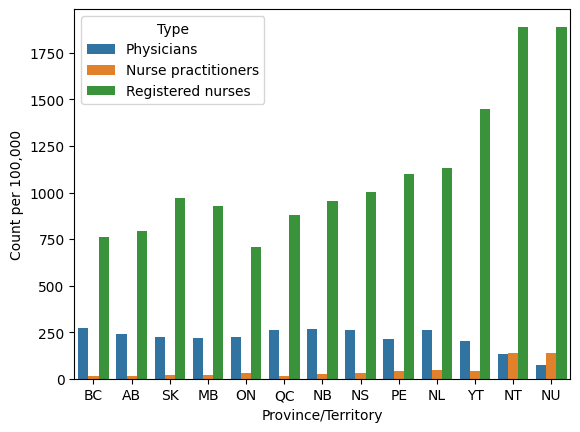

In [7]:
# Create a bar plot of numbers of workers within each province
sns.barplot(x = "Province/Territory", y = "Count per 100,000", hue = "Type", 
            order = ["BC", "AB", "SK", "MB", "ON", "QC", "NB", "NS", "PE", "NL", "YT", "NT", "NU"], data = workers)

In [8]:
# Import data from Ontario to look at long-term trends from 2019-2023
workers_ON = pd.read_excel("canada_health_workforce.xlsx", sheet_name = "Table 7", skiprows = 1)
workers_ON.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Type of professional             47 non-null     object 
 1   Year                             185 non-null    float64
 2   Ontario: Count                   185 non-null    object 
 3   Ontario: Per 100,000 population  185 non-null    object 
 4   Ontario: Female (%)              185 non-null    object 
 5   Ontario: Age <30 years (%)       185 non-null    object 
 6   Ontario: Age 30–59 years (%)     185 non-null    object 
 7   Ontario: Age 60+ years (%)       185 non-null    object 
dtypes: float64(1), object(7)
memory usage: 12.3+ KB


In [9]:
# Clean data
workers_ON["Type of professional"] = workers_ON["Type of professional"].ffill() # fill NaNs in Type column
workers_ON = workers_ON.loc[workers_ON["Type of professional"].isin(["Physicians", "Nurse practitioners", "Registered nurses"])].iloc[:, [0, 1, 2, 5, 6, 7]]
workers_ON.columns = ["Type", "Year", "Count", "Younger than 30yo", "30-59yo", "Older than 60yo"]
workers_ON = workers_ON.astype({"Year": "int", "Count": "float", "Younger than 30yo": "float",
                                "30-59yo": "float", "Older than 60yo": "float"})
workers_ON.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 115 to 164
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type               15 non-null     object 
 1   Year               15 non-null     int64  
 2   Count              15 non-null     float64
 3   Younger than 30yo  15 non-null     float64
 4   30-59yo            15 non-null     float64
 5   Older than 60yo    15 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 840.0+ bytes


<Axes: xlabel='Year', ylabel='Count'>

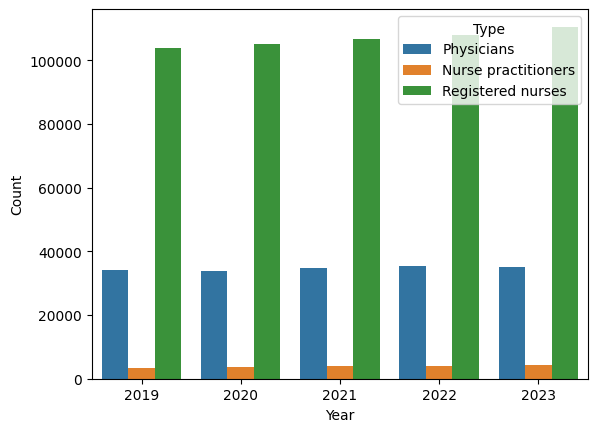

In [10]:
# Create bar plot to look at changes in worker type from 2019-2023
sns.barplot(x = "Year", y = "Count", hue = "Type", data = workers_ON)

<Axes: xlabel='Year', ylabel='Percent'>

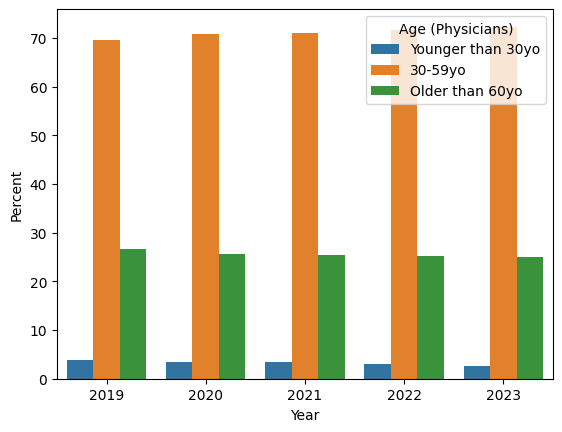

In [11]:
# Create bar plot of ages of physicians
workers_ON_phys = workers_ON.loc[workers_ON["Type"] == "Physicians"]
workers_ON_phys = workers_ON_phys[["Year", "Younger than 30yo", "30-59yo", "Older than 60yo"]].melt("Year", 
                                                                                                    var_name = "Age (Physicians)",
                                                                                                    value_name = "Percent")
sns.barplot(x = "Year", y = "Percent", hue = "Age (Physicians)", data = workers_ON_phys)

<Axes: xlabel='Year', ylabel='Percent'>

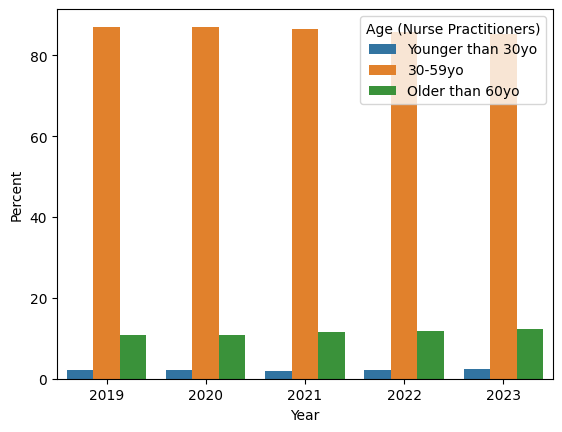

In [12]:
# Create bar plot of ages of nurse practitioners
workers_ON_nps = workers_ON.loc[workers_ON["Type"] == "Nurse practitioners"]
workers_ON_nps = workers_ON_nps[["Year", "Younger than 30yo", "30-59yo", "Older than 60yo"]].melt("Year", 
                                                                                                    var_name = "Age (Nurse Practitioners)",
                                                                                                    value_name = "Percent")
sns.barplot(x = "Year", y = "Percent", hue = "Age (Nurse Practitioners)", data = workers_ON_nps)

<Axes: xlabel='Year', ylabel='Percent'>

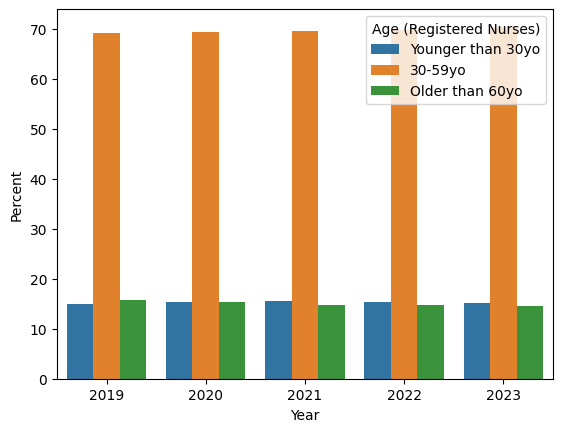

In [13]:
# Create bar plot of ages of registered nurses
workers_ON_rns = workers_ON.loc[workers_ON["Type"] == "Registered nurses"]
workers_ON_rns = workers_ON_rns[["Year", "Younger than 30yo", "30-59yo", "Older than 60yo"]].melt("Year", 
                                                                                                    var_name = "Age (Registered Nurses)",
                                                                                                    value_name = "Percent")
sns.barplot(x = "Year", y = "Percent", hue = "Age (Registered Nurses)", data = workers_ON_rns)